In [10]:
import librosa
import IPython.display as ipd
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
import numpy as np
import sklearn as sk

# MFCC

## Leer el audio

<class 'numpy.ndarray'> 22050
22050


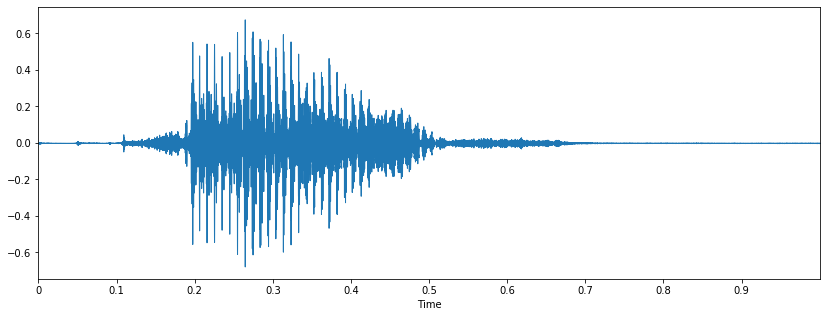

In [15]:
audio_path = '../data/five/0a2b400e_nohash_0.wav'
x , sr = librosa.load(audio_path)
print(type(x), (sr))
librosa.load(audio_path, sr=sr)

ipd.Audio(audio_path)

#display waveform
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)
print(sr)


(22050,)


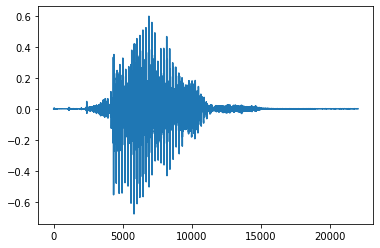

In [16]:
print(x.shape)
plt.plot(x)

## Normalizamos por amplitud

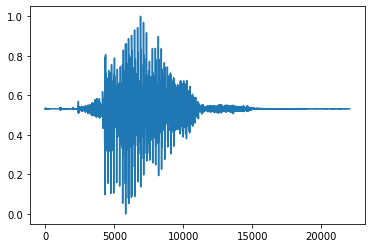

In [17]:
x_normalize=sk.preprocessing.minmax_scale(x, axis=0)
plt.plot(x_normalize)

## Espectograma

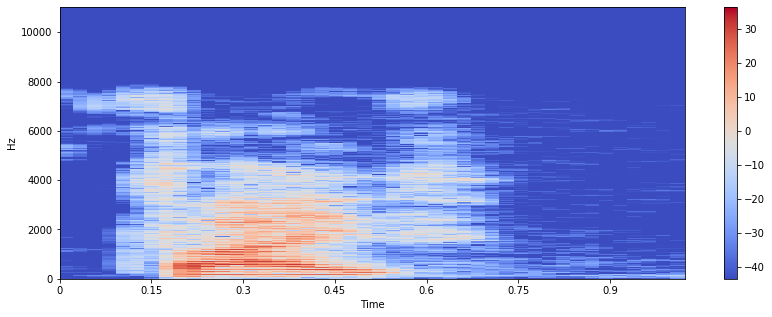

In [19]:
#display Spectrogram
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') 
plt.colorbar()


## MFCCS

- sr= Sampling rate 
- n_mfcc = 20 #  Número de MFCCs
- hop_length = 0.010*sr  # Número de muestras entre ventanas
- n_fft = 0.025*sr # Tamaño de la ventana FFT

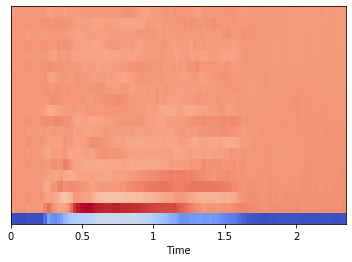

In [25]:
#MFCCS
mfccs = librosa.feature.mfcc(x_normalize, sr=sr,n_mfcc=20,hop_length=int(0.010*sr), n_fft=int(0.025*sr))
#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

In [26]:
print('Shape de MFCC', mfccs.shape)
mfccs

Shape de MFCC (20, 101)


array([[-646.98425  , -655.4446   , -656.7904   , ..., -649.90326  ,
        -649.114    , -642.1769   ],
       [  10.69577  ,   18.624199 ,   20.149654 , ...,   29.741508 ,
          30.840006 ,   39.921387 ],
       [  24.642138 ,   20.859207 ,   20.11605  , ...,   29.273539 ,
          30.323341 ,   37.5151   ],
       ...,
       [  13.064842 ,   16.78643  ,   17.51593  , ...,   15.3662815,
          12.603963 ,   13.505615 ],
       [  27.727825 ,   18.80238  ,   17.255566 , ...,   14.9150305,
          12.052389 ,   13.726839 ],
       [   7.6086965,   15.17186  ,   16.989738 , ...,   14.43253  ,
          11.564777 ,   13.21059  ]], dtype=float32)